Life Expectancy and GDP

In [284]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [295]:
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())
print(df.Country.value_counts())
print(df.Year.value_counts())
print(df.Country.unique())

china = df[df.Country == 'China']
china_min = np.min(china['Life expectancy at birth (years)'])
print(china[china['Life expectancy at birth (years)'] == china_min])

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Chile                       16
China                       16
Germany

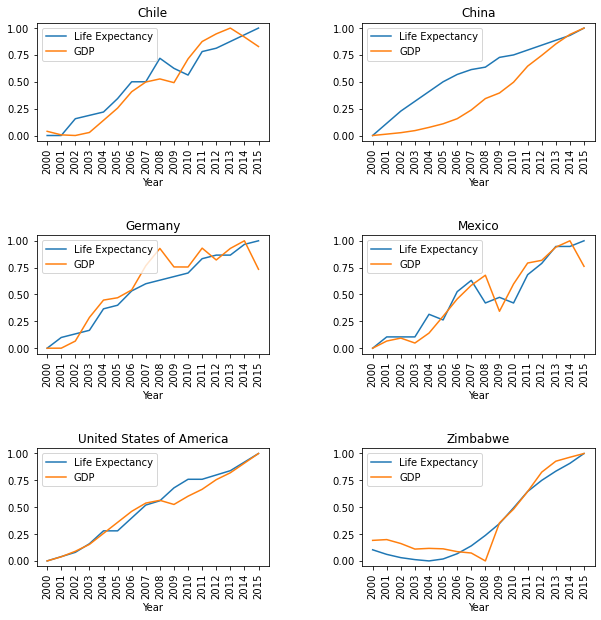

In [283]:
def life_vs_gdp(df):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(df.Country.unique())):
        countries = df.Country.unique()
        data = df[df.Country == countries[i]]
        scaler = MinMaxScaler()
        norm_data = scaler.fit_transform(data[['Life expectancy at birth (years)', 'GDP']])

        ax = plt.subplot(3, 2, (i+1))
        ax.set_xticks([x for x in data.Year])
        ax.set_xticklabels([x for x in data.Year], rotation=90)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.8)
        plt.plot(data.Year, norm_data)
        plt.xlabel('Year')
        plt.title(countries[i])
        
        plt.legend(['Life Expectancy', 'GDP'], loc='upper left')
        
        plt.show
    
life_vs_gdp(df)

Life Expectancy Violion Plots for each country

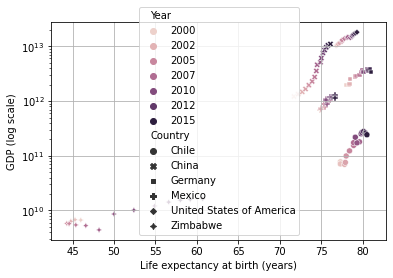

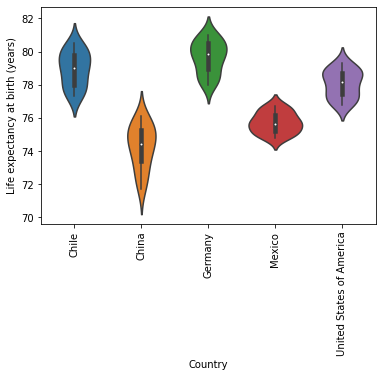

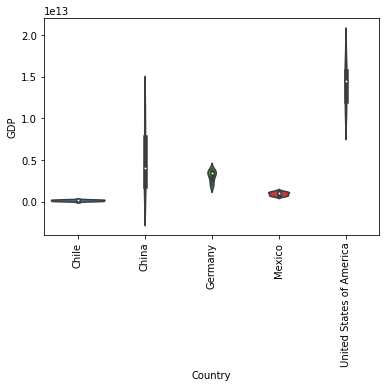

16    71.7
Name: Life expectancy at birth (years), dtype: float64


<Figure size 432x288 with 0 Axes>

In [300]:
df1 = df[df.Country != 'Zimbabwe']

scaler = MinMaxScaler()
norm_data = scaler.fit_transform(df[['Life expectancy at birth (years)', 'GDP']])

sns.scatterplot(data=df, x='Life expectancy at birth (years)', y='GDP', hue='Year', style='Country')
plt.grid()
plt.yscale('log')
plt.ylabel('GDP (log scale)')
plt.show()
plt.clf()
#Zimbabwe life expectency is very distributed, and is significantly less compared to the other countries.
#Let's try to examine life expectancy between the other countries without Zimbabwe

sns.violinplot(data=df1, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.show()
plt.clf()

sns.violinplot(data=df1, x='Country', y='GDP')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.show()
plt.clf()

print(df['Life expectancy at birth (years)'][(df.Country == 'China') & (df.Year == 2000)])

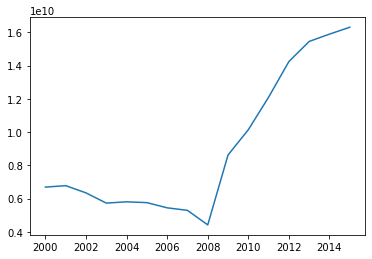

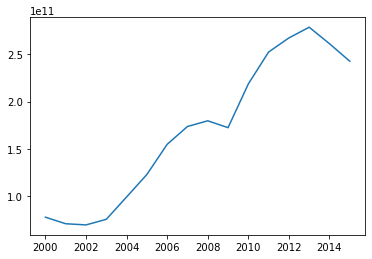

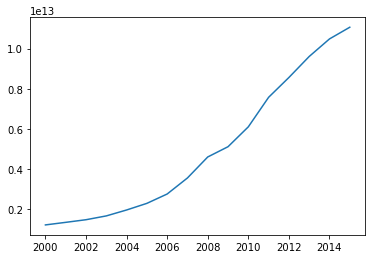

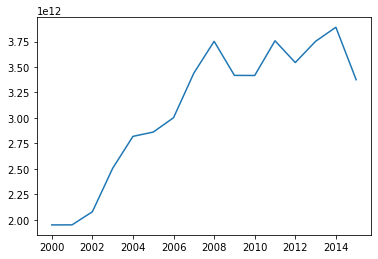

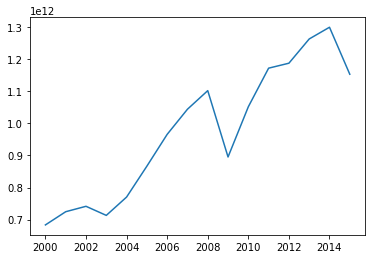

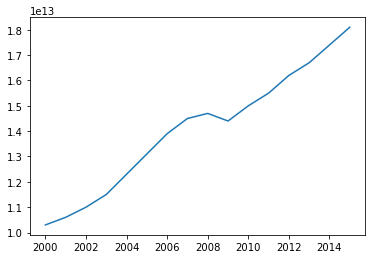

<Figure size 432x288 with 0 Axes>

In [68]:
df_zimbabwe = df[df.Country == 'Zimbabwe']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

df_zimbabwe = df[df.Country == 'Chile']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

df_zimbabwe = df[df.Country == 'China']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

df_zimbabwe = df[df.Country == 'Germany']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

df_zimbabwe = df[df.Country == 'Mexico']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

df_zimbabwe = df[df.Country == 'United States of America']
plt.plot(df_zimbabwe.Year, df_zimbabwe.GDP)
plt.show()
plt.clf()

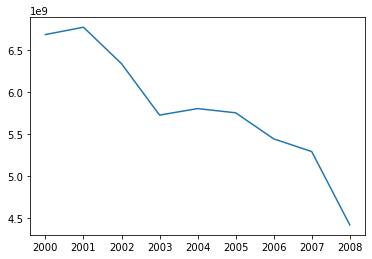

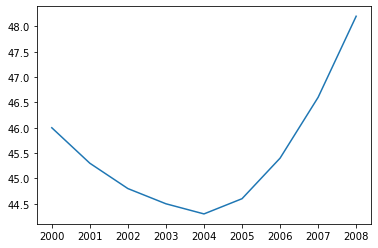

<Figure size 432x288 with 0 Axes>

In [91]:
zim_decline = df[(df.Year <= 2008) & (df.Country == 'Zimbabwe')]
plt.plot(zim_decline.Year, zim_decline.GDP)
plt.show()
plt.clf()

plt.plot(zim_decline.Year, zim_decline['Life expectancy at birth (years)'])
plt.show()
plt.clf()

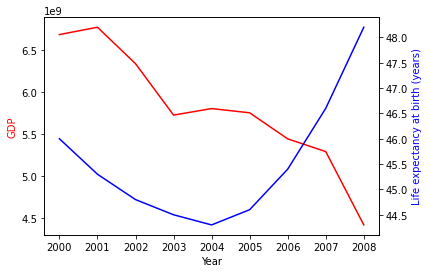

In [92]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color=color)
ax1.plot(zim_decline.Year, zim_decline.GDP, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Life expectancy at birth (years)', color=color)  # we already handled the x-label with ax1
ax2.plot(zim_decline.Year, zim_decline['Life expectancy at birth (years)'], color=color)
plt.show()

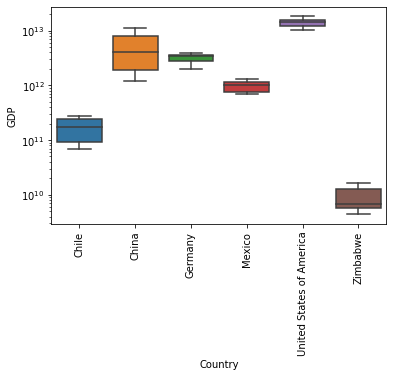

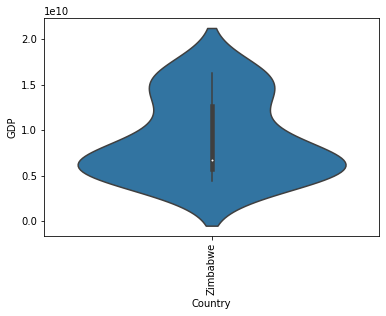

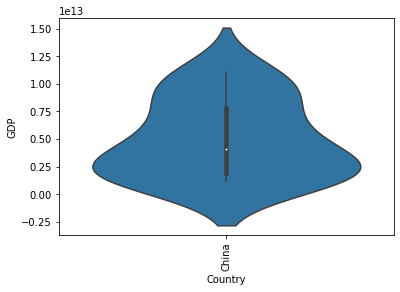

<Figure size 432x288 with 0 Axes>

In [38]:
#Let's examine GDP for each country and see how that relates to life expectancy
sns.boxplot(data=df, x='Country', y='GDP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()
plt.clf()

#let's try just plotting zimbabwe GDP
df_zimbabwe = df[df.Country == 'Zimbabwe']
sns.violinplot(data=df_zimbabwe, x='Country', y='GDP')
plt.xticks(rotation=90)
plt.show()
plt.clf()

df_china = df[df.Country == 'China']
sns.violinplot(data=df_china, x='Country', y='GDP')
plt.xticks(rotation=90)
plt.show()
plt.clf()